# Quantum Volume Demo

Show some basic functionality of the quantum volume experiment.

In [1]:
import qiskit_experiments as qe
from qiskit import Aer
from qiskit.providers.aer import AerSimulator

# For simulation
from qiskit.test.mock import FakeSydney
backend = AerSimulator.from_backend(FakeSydney())

## Run QV experiment

---------------------------------------------------
Experiment: QuantumVolume
Experiment ID: 9d91d7cc-fc21-48bb-a3bf-57c8735f43a7
Status: DONE
Circuits: 100
Analysis Results: 1
---------------------------------------------------
Last Analysis Result
- quantum volume: 1
- qv success: False
- confidence: 0.9671702090007046
- heavy output probability: [0.798828125, 0.7236328125, 0.7626953125, 0.7587890625, 0.7412109375, 0.6845703125, 0.765625, 0.7314453125, 0.7353515625, 0.7177734375, 0.6669921875, 0.8154296875, 0.7421875, 0.716796875, 0.7119140625, 0.6748046875, 0.708984375, 0.7998046875, 0.724609375, 0.70703125, 0.681640625, 0.705078125, 0.638671875, 0.8369140625, 0.8359375, 0.7587890625, 0.798828125, 0.8935546875, 0.7373046875, 0.6416015625, 0.751953125, 0.7177734375, 0.75, 0.7412109375, 0.728515625, 0.74609375, 0.921875, 0.8017578125, 0.759765625, 0.689453125, 0.64453125, 0.8154296875, 0.7705078125, 0.763671875, 0.81640625, 0.6640625, 0.7373046875, 0.71875, 0.6943359375, 0.7216796875,

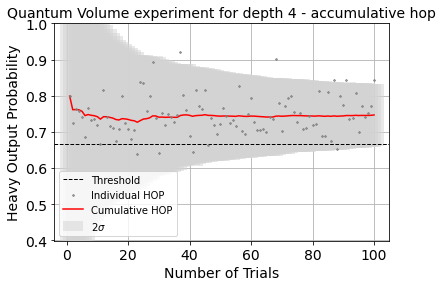

In [2]:
qubits = 4 # Can use specific qubits. for example [2, 4, 7]

qv_exp = qe.quantum_volume.QuantumVolume(qubits)
# Transpile options like optimization_level affect only the real device run and not the simulation run
# Run options affect both simulation and real device runs
qv_exp.set_transpile_options(optimization_level=3)
expdata = qv_exp.run(backend)

# View result data
print(expdata)

### Adding trials

More trials will reduce the error bars to allow passing the threshold (beside the error bars - Quantum Volume experiment must have at least 100 trials to consider successful). <br>
In case you want to add less than 100 additional trials, you can modify the amount of trials added before re-running the experiment.

---------------------------------------------------
Experiment: QuantumVolume
Experiment ID: 9d91d7cc-fc21-48bb-a3bf-57c8735f43a7
Status: DONE
Circuits: 160
Analysis Results: 2
---------------------------------------------------
Last Analysis Result
- quantum volume: 16
- qv success: True
- confidence: 0.9889535200997546
- heavy output probability: [0.798828125, 0.7236328125, 0.7626953125, 0.7587890625, 0.7412109375, 0.6845703125, 0.765625, 0.7314453125, 0.7353515625, 0.7177734375, 0.6669921875, 0.8154296875, 0.7421875, 0.716796875, 0.7119140625, 0.6748046875, 0.708984375, 0.7998046875, 0.724609375, 0.70703125, 0.681640625, 0.705078125, 0.638671875, 0.8369140625, 0.8359375, 0.7587890625, 0.798828125, 0.8935546875, 0.7373046875, 0.6416015625, 0.751953125, 0.7177734375, 0.75, 0.7412109375, 0.728515625, 0.74609375, 0.921875, 0.8017578125, 0.759765625, 0.689453125, 0.64453125, 0.8154296875, 0.7705078125, 0.763671875, 0.81640625, 0.6640625, 0.7373046875, 0.71875, 0.6943359375, 0.7216796875,

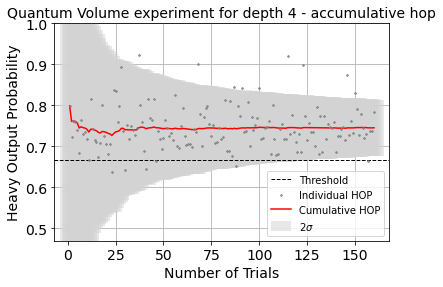

In [3]:
qv_exp.set_experiment_options(trials=60)
expdata2 = qv_exp.run(backend, experiment_data=expdata)
print(expdata2)

### Using another backed for simulation

---------------------------------------------------
Experiment: QuantumVolume
Experiment ID: daddbbbc-d4b3-4daf-9ab7-76e969226c77
Status: DONE
Circuits: 100
Analysis Results: 1
---------------------------------------------------
Last Analysis Result
- quantum volume: 1
- qv success: False
- confidence: 0.8925099586664409
- heavy output probability: [0.7255859375, 0.703125, 0.7373046875, 0.71484375, 0.7783203125, 0.6650390625, 0.7470703125, 0.7548828125, 0.8212890625, 0.724609375, 0.6767578125, 0.8671875, 0.6650390625, 0.6826171875, 0.7119140625, 0.720703125, 0.7578125, 0.7294921875, 0.806640625, 0.67578125, 0.6337890625, 0.70703125, 0.7578125, 0.685546875, 0.681640625, 0.6767578125, 0.7431640625, 0.6689453125, 0.74609375, 0.767578125, 0.7041015625, 0.75, 0.78125, 0.7490234375, 0.76953125, 0.75390625, 0.66796875, 0.7294921875, 0.666015625, 0.732421875, 0.7138671875, 0.6396484375, 0.7470703125, 0.7734375, 0.6708984375, 0.7353515625, 0.736328125, 0.6875, 0.763671875, 0.689453125, 0.745117

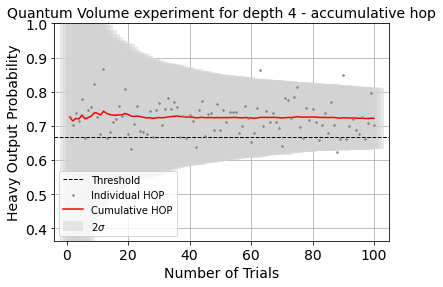

In [4]:
another_simulation_backend = Aer.get_backend('aer_simulator_matrix_product_state')
qv_exp2 = qe.quantum_volume.QuantumVolume(qubits, simulation_backend=another_simulation_backend)
expdata3 = qv_exp2.run(backend)
print(expdata3)

### Running Quantum Volume using a batch experiment

Run the experiment with an increasing number of qubits to check what is the maximum Quantum Volume for the specific device. To reach the real system's Quantum Volume, one must run more trials and additional enhancements might be required (readout error mitigation for example).

---------------------------------------------------
Experiment: BatchExperiment
Experiment ID: 8301514e-576c-4be0-a895-19f40a00ac09
Status: DONE
Component Experiments: 4
Circuits: 1000
Analysis Results: 1
---------------------------------------------------
Last Analysis Result
- experiment_types: ['QuantumVolume', 'QuantumVolume', 'QuantumVolume', 'QuantumVolume']
- experiment_ids: ['356c75bb-7d65-463c-a650-aff4ee0d6f8b', 'a22d9045-ff2c-4e07-947e-ef8092f1af0f', '131bc99c-9636-48ab-9b9f-c916725a396a', 'c1b5eebf-8a17-4644-8419-f98d6cd94efb']
- experiment_qubits: [(0, 1, 2), (0, 1, 2, 3), (0, 1, 2, 3, 4), (0, 1, 2, 3, 4, 5)]
- success: True


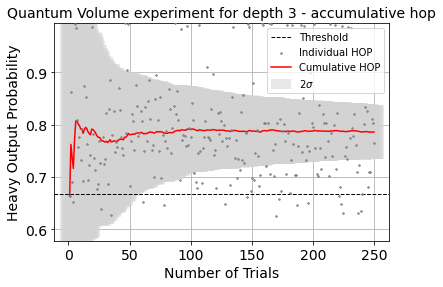

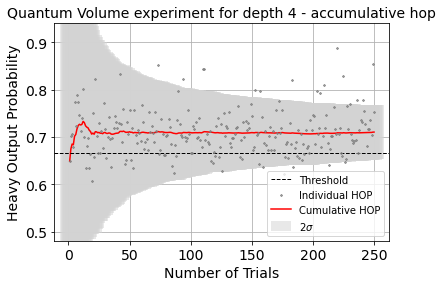

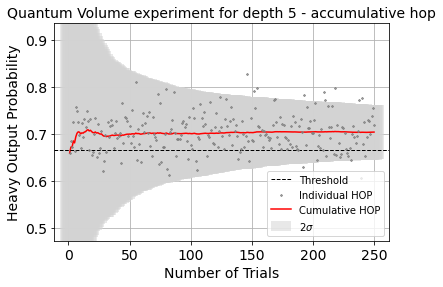

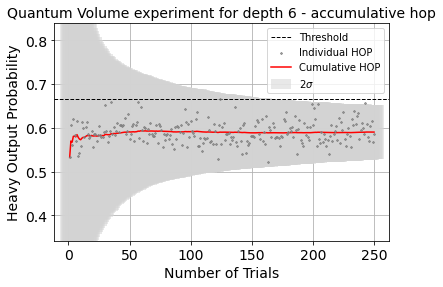

In [6]:
exps = [qe.quantum_volume.QuantumVolume(i) for i in range(3,7)]
for exp in exps:
    exp.set_experiment_options(trials=250)
    exp.set_transpile_options(optimization_level=3)
batch_exp = qe.composite.BatchExperiment(exps)
batch_expdata = batch_exp.run(backend)
print(batch_expdata)

Extracting the maximum Quantum Volume.

In [7]:
qv = [batch_expdata.component_experiment_data(i).analysis_result(-1)['quantum volume'] 
      for i in range(batch_exp.num_experiments)]
print("Max quantum volume is: " + str(max(qv)))

Max quantum volume is: 8
